<a href="https://colab.research.google.com/github/madz23/madz_nnprojects/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Cats and Dogs
Applied Neural Networks <br/>
Dr. Leslie Kerby

Kaggle contains many useful datasets and data science competitions. It also has great tutorials and discussion boards. The data for this assignment comes from the [Kaggle Cats vs Dogs competition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview). Images such as these were once used for CAPTCHA (after digits and the alphabet proved too crackable). As stated in the overview, many years ago computer vision experts posited that a classifier with better than 60% accuracy would be difficult without a major advance in the state of the art (you should do better than this even without using CNNs). However, even back in 2014 state of the art machine learning could exceed 80% accuracy on this cat and dog dataset. This meant it was no longer useful for CAPTCHA. Currently, with the utilization of transfer learning this accuracy can exceed 95%.  

**Part 1** <br/>
Download the dataset. Go to [this link](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) and set up your computer and Colab to easily download Kaggle datasets. Then download the `dogs-vs-cats-redux-kernels-edition` dataset. <br/>
*Note: You may set up the dataset another way (run jupyter locally etc) if you prefer*

In [ ]:
# Install keras tuner for part 4
! pip install keras_tuner --upgrade

     |████████████████████████████████| 98 kB 3.8 MB/s 


In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

import keras_tuner as kt
from tensorflow import keras



In [ ]:
#google keras tuner for classification 

# import kaggle
from google.colab import files
files.upload()         

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madz23","key":"9944302024c5596f1928986ceca3aa75"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# make sure Kaggle is imported correctly
! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
mkoklu42/acoustic-extinguisher-fire-dataset                      Acoustic Extinguisher Fire Dataset                 620KB  2022-02-09 17:59:52            230  
mkoklu42/durum-wheat-dataset                                     Durum Wheat Dataset                                983MB  2022-02-18 09:34:17             58  
mkoklu42/grapevine-leaves-image-dataset                          Grapevine Leaves Image Dataset                     109MB  2022-02-09 18:21:40            175  
mkoklu42/rice-image-dataset                                      Rice Image Dataset                                 222MB  2022-02-07 14:32:24            236  
mkoklu42/pumpkin-seeds-dataset          

In [ ]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 534M/544M [00:03<00:00, 180MB/s]
100% 544M/544M [00:03<00:00, 177MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 115MB/s]
100% 271M/271M [00:01<00:00, 209MB/s]
100% 271M/271M [00:01<00:00, 194MB/s]


In [ ]:
# made a directory for our dataset
! mkdir train

mkdir: cannot create directory ‘train’: File exists


In [ ]:
! unzip train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

**Part 2**<br/>
Preprocess the dataset (load it into one dataframe and create your `y` labels). <br/> 
Print 5 sample images of dogs and cats (BEFORE they have been resized).

In [ ]:
# You may find the following code hints useful

import os
import pandas as pd


filenames = os.listdir("train/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
# Note: this randomizes the filenames

In [ ]:
df.head(5)

,filename,category
0,cat.1763.jpg,1
1,cat.2826.jpg,1
2,dog.11426.jpg,0
3,dog.619.jpg,0
4,dog.11469.jpg,0


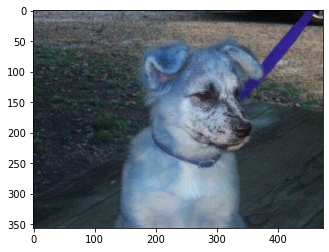

In [ ]:
import matplotlib.pyplot as plt

import cv2
img = cv2.imread('train/train/'+df['filename'][1249], cv2.IMREAD_COLOR)
plt.imshow(img)

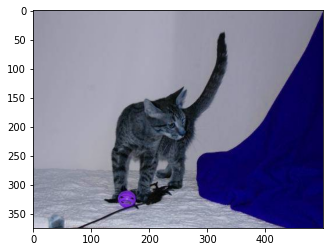

In [ ]:
img = cv2.imread('train/train/'+df['filename'][0], cv2.IMREAD_COLOR)
plt.imshow(img)

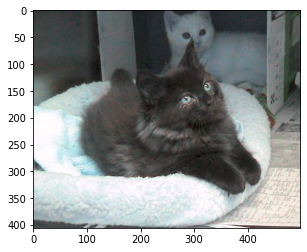

In [ ]:
img = cv2.imread('train/train/'+df['filename'][7887], cv2.IMREAD_COLOR)
plt.imshow(img)

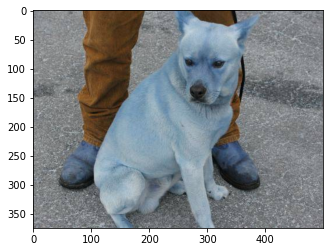

In [ ]:
img = cv2.imread('train/train/'+df['filename'][557], cv2.IMREAD_COLOR)
plt.imshow(img)

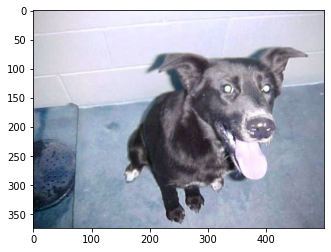

In [ ]:
img = cv2.imread('train/train/'+df['filename'][234], cv2.IMREAD_COLOR)
plt.imshow(img)

You can then take `df` and create `y` from it and add each image to `X` (in order as found in df). Note that the images are all different sizes -- so we will need to resize and interpolate them before inputing them in Keras.

In [ ]:
# We haven't covered this yet so I'm giving you the code 
import cv2
import numpy as np

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((25000,80,80,3)) # 25000 images, 80x80 pixels, 3 channels (RGB) 
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('train/train/'+image_file)


**Part 3**<br/>
Now split the training data into training (15000 images), validation (5000 images), and testing (5000 images) datasets.

In [ ]:
# X_train_full = X / 255
# y_train_full = (df['category'].to_numpy(dtype='int8')) / 255

# Took up too much memory to store these as variables

In [ ]:
# Create validation dataset
from sklearn.model_selection import train_test_split


x_train_t, x_train_v, y_train_t, y_train_v = train_test_split(X / 255, (((df['category'].to_numpy(dtype='int8')) / 255)), test_size = 5000, train_size = 15000)


**Part 4**<br/>
Try different NN architectures and options. Use KerasTuner (or alternatively the sklearn tools RandomizedSearchCV or GridSearchCV) as part of this. Try at least one deep neural network with at least 50 hidden layers. Clearly state initialization, activation, architecture (including # layers and neurons, and pathways), any normalization/regularization used, and other relevant information for each model. 

You are NOT expected to utilize transfer learning, data augmentation, or convolutional neural networks (these will be added in a future assignment). 

Give converged validation and testing accuracy for each model trained (utilizing the EarlyStopping callback). Which one was the best? Display five misclassified images from your best model. Why do you think it was the best? Note: Your grade for this homework will depend on the quality of your best model.

# Model 0: Basic Sequential API for Comparison Purposes

In [ ]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(500, activation = "relu", input_shape = (80,80,3), name = "1-hidden-layer"))
model.add(keras.layers.Dense(500, activation = "relu", input_shape = (80,80,3), name = "2-hidden-layer"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer"))

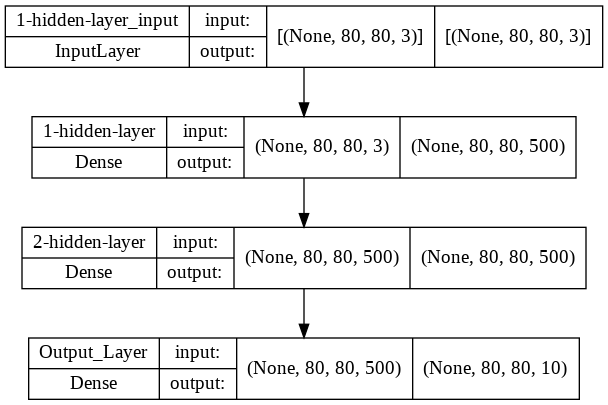

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [ ]:
history = model.fit(x_train_t, y_train_t, epochs = 30, batch_size = 32, validation_data = (x_train_v, y_train_v))

Epoch 1/30


InvalidArgumentError: ignored

In [ ]:
keras.backend.clear_session()

# Model 1: Deep NN

In [ ]:

import keras_tuner as kt
from tensorflow import keras
import tensorflow as tf

# This should produce a NN with at least 50 layers 
# I took some examples from the tensorflow website for each of my models
# https://www.tensorflow.org/tutorials/keras/keras_tuner

def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
      hp.Int('units', min_value=50, max_value=100, step=8), # this will allow 50-100 layers
      activation='relu'))
    model.add(keras.layers.Dense(
      hp.Choice('units_2', [8, 16, 32]),   
      activation='relu'))
    model.add(keras.layers.Dense(1))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(loss='mse', metrics=["accuracy"], optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))

    return model

In [ ]:
from keras_tuner.tuners.hyperband import Hyperband
tuner = Hyperband(model_builder, objective='val_accuracy',
                  max_epochs=10,
                  factor=3)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(x_train_t, y_train_t, epochs=50, validation_split=0.2, callbacks=[stop_early])


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)

history = model.fit(x_train_t, y_train_t, epochs=20, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
375/375 [==============================] - 17s 43ms/step - loss: 5.0209e-05 - accuracy: 0.5042 - val_loss: 4.9278e-06 - val_accuracy: 0.4917
Epoch 2/50
375/375 [==============================] - 15s 41ms/step - loss: 4.6784e-06 - accuracy: 0.5042 - val_loss: 4.4567e-06 - val_accuracy: 0.4917
Epoch 3/50
375/375 [==============================] - 15s 41ms/step - loss: 4.4003e-06 - accuracy: 0.5042 - val_loss: 4.3660e-06 - val_accuracy: 0.4917
Epoch 4/50
375/375 [==============================] - 15s 40ms/step - loss: 4.3108e-06 - accuracy: 0.5042 - val_loss: 4.2568e-06 - val_accuracy: 0.4917
Epoch 5/50
375/375 [==============================] - 15s 41ms/step - loss: 4.2002e-06 - accuracy: 0.5042 - val_loss: 4.2520e-06 - val_accuracy: 0.4917
Epoch 6/50
375/375 [==============================] - 15s 41ms/step - loss: 4.1694e-06 - accuracy: 0.5042 - val_loss: 4.0967e-06 - val_accuracy: 0.4917
Epoch 7/50
375/375 [==============================] - 15s 41ms/step - loss: 4.2376e-06 -

In [ ]:
eval_result = model.evaluate(x_train_v, y_train_v)

157/157 [==============================] - 4s 27ms/step - loss: 4.5782e-06 - accuracy: 0.4932


In [ ]:
keras.backend.clear_session()

# Model 2: Keras tuner

In [ ]:
from sklearn.utils import validation


# Here I will define a model class that can be applied later. This was taken from the Tensorflow website
# https://www.tensorflow.org/tutorials/keras/keras_tuner#define_the_model

import keras_tuner as kt
from tensorflow import keras
import tensorflow as tf

def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
      hp.Int('units', min_value=8, max_value=32, step=8), # This will allow 8-32 layers
      activation='relu'))
    model.add(keras.layers.Dense(
      hp.Choice('units_2', [8, 16, 32]),   
      activation='relu'))
    model.add(keras.layers.Dense(1))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(loss='mse', metrics=["accuracy"], optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))

    return model


In [ ]:
# Now we can make the tuner. We will use Hyperband this time
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy')


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(x_train_t, y_train_t, epochs=20, validation_data=(x_train_v, y_train_v),
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])
# Note: this is not building or training the model. Here, keras tuner finds the best hyper parameter values for us to use


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary() # This looks good, we should be able to build our model now

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 16
units_2: 16
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 5.630354404449463
Trial summary
Hyperparameters:
units: 24
units_2: 16
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 3.420257329940796
Trial summary
Hyperparameters:
units: 24
units_2: 32
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.5109679698944092
Trial summary
Hyperparameters:
units: 16
units_2: 32
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.5109572410583496
Trial summary
Hyperparameters:
units: 16
units_2: 16
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.5090742707252502
Trial summary
Hyperparameters

In [ ]:
# Get the best model from the search
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)

In [ ]:
# Now we can train our model
model.fit(x_train_t, y_train_t, epochs=15, validation_data=(x_train_v, y_train_v),
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
469/469 [==============================] - 17s 30ms/step - loss: 26.8123 - accuracy: 0.4972 - val_loss: 3.0825 - val_accuracy: 0.4987
Epoch 2/15
469/469 [==============================] - 16s 34ms/step - loss: 2.4316 - accuracy: 0.4999 - val_loss: 2.1727 - val_accuracy: 0.4988
Epoch 3/15
469/469 [==============================] - 13s 28ms/step - loss: 1.8800 - accuracy: 0.4995 - val_loss: 1.7254 - val_accuracy: 0.4986
Epoch 4/15
469/469 [==============================] - 13s 28ms/step - loss: 1.5026 - accuracy: 0.4995 - val_loss: 1.3678 - val_accuracy: 0.4985
Epoch 5/15
469/469 [==============================] - 13s 28ms/step - loss: 1.2451 - accuracy: 0.5001 - val_loss: 1.1477 - val_accuracy: 0.4985
Epoch 6/15
469/469 [==============================] - 13s 28ms/step - loss: 1.0456 - accuracy: 0.5002 - val_loss: 0.9362 - val_accuracy: 0.4990
Epoch 7/15
469/469 [==============================] - 13s 29ms/step - loss: 0.8395 - accuracy: 0.4994 - val_loss: 0.7127 - val_accuracy

In [ ]:
eval_result = model.evaluate(x_train_t, y_train_t)
print("[test loss, test accuracy]:", eval_result)

In [ ]:
keras.backend.clear_session()

# Model 3: Deep NN using keras wrapper


In [ ]:

from tensorflow import keras
# Create a function that will build and compile model with user parameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=5e-3, input_shape=[80, 80, 3]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1))
  model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
  return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
keras_reg.fit(x_train_t, y_train_t, epochs=10,  
              validation_data=(x_train_v, y_train_v),
              callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/10
469/469 [==============================] - 12s 22ms/step - loss: 2872528338944.0000 - val_loss: 8203047.0000
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 879309.1875 - val_loss: 660.9334
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 71.0441 - val_loss: 0.3100
Epoch 4/10
469/469 [==============================] - 10s 20ms/step - loss: 0.2558 - val_loss: 0.2500
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.2501 - val_loss: 0.2501
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2500 - val_loss: 0.2502
Epoch 7/10
469/469 [==============================] - 10s 20ms/step - loss: 0.2500 - val_loss: 0.2503
Epoch 8/10
469/469 [==============================] - 9s 20ms/step - loss: 0.2500 - val_loss: 0.2500
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.2500 - val_loss: 0.2500


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden" : [1, 2, 3, 4],
    "n_neurons" : np.arange(5, 101, 5),
    "learning_rate" : [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
} # This will pick a random parameter tuning

In [ ]:
random_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10,
                                      cv=2, verbose=2)
random_search_cv.fit(x_train_t, y_train_t, epochs=20, validation_data=(x_train_v, y_train_v),
                     callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [ ]:
keras.backend.clear_session()

# Conclusions

I tried two different models using keras tuner, one model using keras wrapper, and one sequential API for comparison purposes. However, I obtained my best results using the Sequential API. I don't think keras tuner is the best tool for this problem, so for our goals of 60% accuracy, a simple sequential API is sufficient. 

**Graduate students only**<br/>
Prepare a submission to Kaggle by making predictions on the test data. Submit a screenshot of your submission and accuracy results.